In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pandas_datareader import data
from datetime import datetime
from dateutil.relativedelta import relativedelta
from sklearn import linear_model

In [2]:
fig_size_1 = (15, 5)
fig_size_2 = (7, 7)

today = datetime.today().strftime('%Y-%m-%d')
three_months = (datetime.today()-relativedelta(months=3)).strftime('%Y-%m-%d')
one_year = (datetime.today()-relativedelta(years=1)).strftime('%Y-%m-%d')
five_years = (datetime.today()-relativedelta(years=5)).strftime('%Y-%m-%d')
ten_years = (datetime.today()-relativedelta(years=10)).strftime('%Y-%m-%d')
nineteen_seventy = '1970-01-02'

start_date = one_year
end_date = today

In [3]:
tickers = ['^GSPC', '^IXIC', 'CL=F', 'GC=F', '^VIX', '^TNX',
           'XLK', 'XLV', 'XLY', 'XLF', 'XLI', 'XLP', 'XLU', 'XLB', 'XLE', 'VNQ',
           'SHV', 'VCSH', 'VGSH', 'VCIT', 'VGIT', 'VCLT', 'VGLT', 'BND', 'BTC-USD', 'TSLA']

tickers_plot = ['^GSPC']

In [4]:
def filter_and_pivot(df_input, date):
    df_filtered = df_input[df_input['Date'] >= date]
    df_pivoted = pd.pivot_table(df_filtered, values='Change', index='Date', columns='Ticker')
#     df_pivoted = df_pivoted.dropna()
    return df_pivoted

def plot_beta(x, y, plot=False):
    dff = pd.DataFrame()
    dff['x'] = x
    dff['y'] = y
    
    model = linear_model.LinearRegression()
    model.fit(np.array(dff[['x']]), np.array(dff[['y']]))
    dff['pred'] = model.predict(np.array(dff[['x']]))   

    if plot:
        fig, axes = plt.subplots(sharex=True)
        dff.plot(x='x', y='y', kind='scatter', ax=axes, figsize=fig_size_2, grid=True, title='Beta ('+str(len(dff))+')')
        dff.plot(x='x', y='pred', kind='line', color='Red', ax=axes, figsize=fig_size_2, grid=True)
    
    print('Beta:', round(model.coef_[0][0], 3))

In [5]:
df = pd.DataFrame()
for t in tickers:
    df_temp = data.DataReader(t, 'yahoo', nineteen_seventy, today).reset_index()[['Date', 'Close']]
    df_temp['Ticker'] = [t] * len(df_temp)
    df_temp['Change'] = df_temp['Close'].pct_change()
    df = df.append(df_temp)
df

,Date,Close,Ticker,Change
0,1970-01-02,93.000000,^GSPC,NaN
1,1970-01-05,93.459999,^GSPC,0.004946
2,1970-01-06,92.820000,^GSPC,-0.006848
3,1970-01-07,92.629997,^GSPC,-0.002047
4,1970-01-08,92.680000,^GSPC,0.000540
...,...,...,...,...
2680,2021-02-22,714.500000,TSLA,-0.085499
2681,2021-02-23,698.840027,TSLA,-0.021917
2682,2021-02-24,742.020020,TSLA,0.061788
2683,2021-02-25,682.219971,TSLA,-0.080591


In [6]:
corr_three_months = filter_and_pivot(df, three_months).corr(method='pearson')
corr_one_year = filter_and_pivot(df, one_year).corr(method='pearson')
corr_five_years = filter_and_pivot(df, five_years).corr(method='pearson')
corr_ten_years = filter_and_pivot(df, ten_years).corr(method='pearson')
corr_all = filter_and_pivot(df, nineteen_seventy).corr(method='pearson')

In [7]:
filter_and_pivot(df, one_year)

Ticker,BND,BTC-USD,CL=F,GC=F,SHV,TSLA,VCIT,VCLT,VCSH,VGIT,...,XLI,XLK,XLP,XLU,XLV,XLY,^GSPC,^IXIC,^TNX,^VIX
Date,,,,,,,,,,,,,,,,,,,,,
2020-02-27,0.001162,-0.004085,-0.033655,0.000000,0.000452,-0.128146,-0.002777,-0.009641,-0.000367,0.003685,...,-0.037123,-0.053937,-0.040700,-0.044982,-0.033979,-0.040415,-0.044163,-0.046132,-0.008397,0.420900
2020-02-28,0.006613,-0.012754,-0.049480,-0.046281,0.000633,-0.016215,0.008353,0.014984,0.003544,0.007930,...,-0.018270,0.007640,-0.019777,-0.033421,-0.012897,-0.006433,-0.008238,0.000104,-0.132410,0.024259
2020-02-29,NaN,-0.008411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-01,NaN,-0.004309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-02,-0.002651,0.035879,0.044459,0.018030,-0.000994,0.113220,-0.004248,-0.002821,-0.003410,-0.002622,...,0.035167,0.057825,0.053457,0.058861,0.046863,0.034361,0.046039,0.044915,-0.034605,-0.166791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-23,-0.000232,-0.099302,0.002927,-0.001273,0.000000,-0.021917,0.001367,0.000774,0.000844,0.000731,...,0.003068,-0.002781,0.001385,0.008304,-0.001665,-0.006565,0.001256,-0.005014,-0.005839,-0.014499
2021-02-24,-0.000581,0.018042,0.025134,-0.004434,0.000000,0.061788,0.000630,0.001741,-0.000241,-0.001169,...,0.018897,0.015300,-0.000614,-0.011695,0.006933,0.010488,0.011352,0.009860,0.019824,-0.076590
2021-02-25,-0.008726,-0.052539,0.004903,-0.012247,-0.000090,-0.080591,-0.014479,-0.020085,-0.004819,-0.009361,...,-0.018439,-0.034964,-0.010915,-0.009000,-0.010023,-0.037197,-0.024479,-0.035192,0.092873,0.353796


In [8]:
# plot_beta(filter_and_pivot(df, three_months)['^GSPC'], filter_and_pivot(df, three_months)['^TNX'], plot=True)
# plot_beta(filter_and_pivot(df, one_year)['^GSPC'], filter_and_pivot(df, one_year)['^TNX'], plot=True)
# plot_beta(filter_and_pivot(df, five_years)['^GSPC'], filter_and_pivot(df, five_years)['^TNX'])
# plot_beta(filter_and_pivot(df, ten_years)['^GSPC'], filter_and_pivot(df, ten_years)['^TNX'])
# plot_beta(filter_and_pivot(df, nineteen_seventy)['^GSPC'], filter_and_pivot(df, nineteen_seventy)['^TNX'])

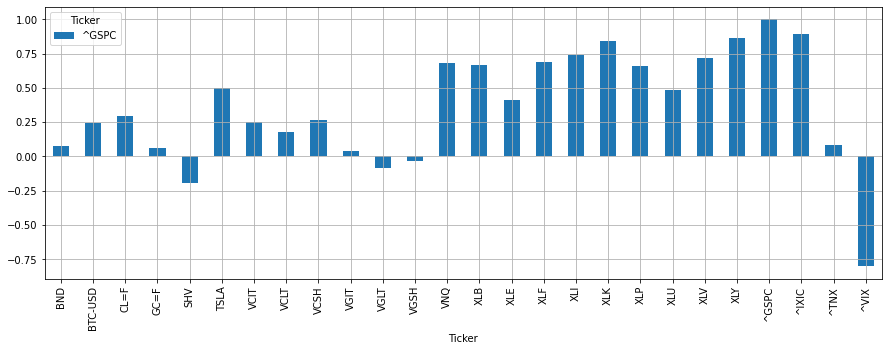

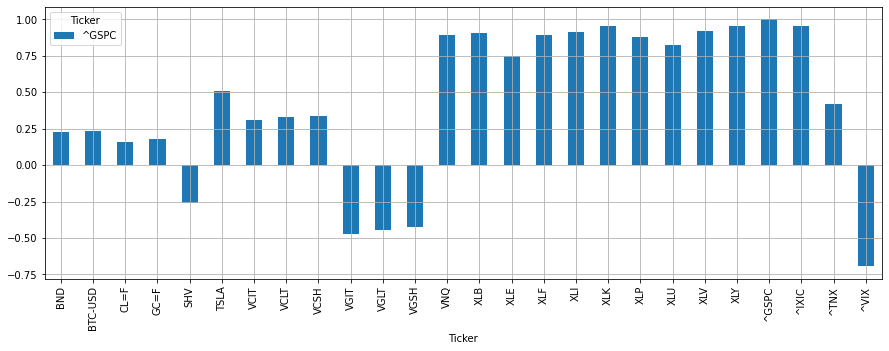

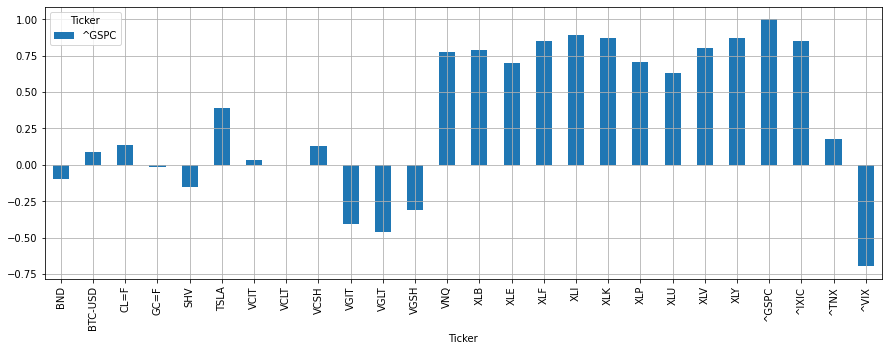

In [10]:
for t in tickers_plot:
    corr_three_months[[t]].plot(kind='bar', figsize=fig_size_1, grid=True)
    corr_one_year[[t]].plot(kind='bar', figsize=fig_size_1, grid=True)
    corr_all[[t]].plot(kind='bar', figsize=fig_size_1, grid=True)